In [32]:
import os, sys, re

In [162]:
os.chdir('C:/Users/nhutchis/OneDrive - University of Wollongong/Smart Waterways/Floodaware/data')
with open('UOW_Flash_Flood_REC_47_RG_Rout_1_Meta_AsCSV.csv', 'r') as file:
    text = file.read()
    parsed_per_sub = re.findall(r'(#####START.*\n((\d{1,4}\.\d{1,4},){8}\d{1,4}\.\d{1,4}\n)*)', text)
    for sub in parsed_per_sub:
        sub_text = sub[0]
        sub_id = int(re.findall(r'_Sub(\d{1,2})', sub_text)[0]) - 1
        sub_values = re.findall(r'(((\d{1,4}\.\d{1,4},){8}\d{1,4}\.\d{1,4}\n)*)', sub_text)
        

In [164]:
sub_values

[('', '', ''),
 ('', '', ''),
 ('', '', ''),
 ('', '', ''),
 ('', '', ''),
 ('', '', ''),
 ('', '', ''),
 ('', '', ''),
 ('', '', ''),
 ('', '', ''),
 ('', '', ''),
 ('', '', ''),
 ('', '', ''),
 ('', '', ''),
 ('', '', ''),
 ('', '', ''),
 ('', '', ''),
 ('', '', ''),
 ('', '', ''),
 ('', '', ''),
 ('', '', ''),
 ('', '', ''),
 ('', '', ''),
 ('', '', ''),
 ('', '', ''),
 ('', '', ''),
 ('', '', ''),
 ('', '', ''),
 ('', '', ''),
 ('', '', ''),
 ('', '', ''),
 ('', '', ''),
 ('', '', ''),
 ('', '', ''),
 ('', '', ''),
 ('', '', ''),
 ('', '', ''),
 ('', '', ''),
 ('', '', ''),
 ('', '', ''),
 ('', '', ''),
 ('', '', ''),
 ('', '', ''),
 ('', '', ''),
 ('', '', ''),
 ('', '', ''),
 ('', '', ''),
 ('', '', ''),
 ('', '', ''),
 ('', '', ''),
 ('', '', ''),
 ('', '', ''),
 ('', '', ''),
 ('', '', ''),
 ('', '', ''),
 ('', '', ''),
 ('', '', ''),
 ('', '', ''),
 ('', '', ''),
 ('', '', ''),
 ('', '', ''),
 ('', '', ''),
 ('', '', ''),
 ('', '', ''),
 ('', '', ''),
 ('', '', ''),
 ('', '', 

In [13]:
def pixel2coord(x, y):
    xoff, a, b, yoff, d, e = raster.GetGeoTransform()

    xp = a * x + b * y + a * 0.5 + b * 0.5 + xoff
    yp = d * x + e * y + d * 0.5 + e * 0.5 + yoff
    return(xp, yp)

In [1]:
import sys, os
import numpy as np
import re, datetime
import gdal, pyproj
from netCDF4 import Dataset
from matplotlib.pyplot import imshow
import rasterio
import numpy as np

In [2]:
os.chdir("C:/users/nhutchis/OneDrive - University of Wollongong/Smart Waterways/Floodaware/data/rainfall/2020/ftp.bom.gov.au/2020/0203/")

In [4]:
files = [file for file in os.listdir() if (".nc" in file and ".nc." not in file)]

3.35


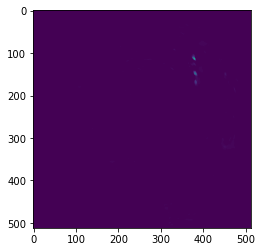

In [5]:
fyle = files[0]#'3_20200201_011500.prcp-c5.nc'
raster = gdal.Open(fyle)
data = Dataset(fyle, "r", format="NETCDF4")
print(data.variables['precipitation'][:,:].max())
imshow(data.variables['precipitation'][:,:])
#imshow(raster.ReadAsArray()[281:292+1,250:262+1])

In [6]:
driver = gdal.GetDriverByName('gtiff')

In [7]:
raster.GetProjection()

'PROJCS["unnamed",GEOGCS["unknown",DATUM["unnamed",SPHEROID["Spheroid",6378137,298.257222096042]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",-34.2625],PARAMETER["longitude_of_center",150.875],PARAMETER["standard_parallel_1",-32.7],PARAMETER["standard_parallel_2",-35.8],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["kilometre",1000,AUTHORITY["EPSG","9036"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'

In [56]:
gdal.GetDataTypeByName('Float32')

6

In [69]:
files[]

'3_20200204_113000.prcp-c5.nc'

In [70]:
for file in files[0:1000]:
    raster = gdal.Open(file)
    newname = re.findall(r'\d{8}_\d{4}', raster.GetDescription())[0]
    gdal.Warp("c:/users/nhutchis/desktop/testout/{}.tif".format(newname), raster)#, outputType=gdal.GetDataTypeByName('Float32'))

In [48]:
newname = re.findall(r'\d{6}_\d{4}', raster.GetDescription())[0]

In [39]:
gdal.Warp("c:/users/nhutchis/desktop/binary.tif", raster)

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x000001F35153B900> >

In [24]:
driver.CreateCopy()

{'DCAP_CREATECOPY': 'YES',
 'DCAP_OPEN': 'YES',
 'DCAP_RASTER': 'YES',
 'DMD_LONGNAME': 'PostGIS Raster driver',
 'DMD_SUBDATASETS': 'YES'}

In [14]:
gdal.Warp('c:/users/nhutchis/desktop/testhere.tif', raster)

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x000001F34F2F0CF0> >

In [16]:
gdal.ReprojectImage(raster, raster, dst_wkt = 'GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1984",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["Degree",0.017453292519943295]]')

3

In [18]:
raster.GetProjection()

'PROJCS["unnamed",GEOGCS["unknown",DATUM["unnamed",SPHEROID["Spheroid",6378137,298.257222096042]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",-34.2625],PARAMETER["longitude_of_center",150.875],PARAMETER["standard_parallel_1",-32.7],PARAMETER["standard_parallel_2",-35.8],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["kilometre",1000,AUTHORITY["EPSG","9036"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'

In [10]:
driver = gdal.GetDriverByName('GTiff')

In [249]:
datetime.datetime.utcfromtimestamp(data.variables['valid_time'][0]*1)

datetime.datetime(2020, 2, 1, 1, 15)

In [398]:
asdf = np.array([[1,2,3],[4,5,6]])
for enum in np.ndenumerate(asdf):
    print(enum)

((0, 0), 1)
((0, 1), 2)
((0, 2), 3)
((1, 0), 4)
((1, 1), 5)
((1, 2), 6)


In [ ]:
def buildData(files, index):
    steps = []
    for file in files:
        raster = gdal.Open(file)
        arr = raster.ReadAsArray()
        xrange = raster.RasterXSize
        yrange = raster.RasterYSize
        name = os.path.basename(file)
        timestamp = re.findall(r'\d{8}_\d{6}', name)[0]
        for x in range(xrange):
            for y in range(yrange):
                idx = str(int(index+x*1e3+y))
                val = arr[y, x]
                print(timestamp, idx, val)
                steps.append({"stamp": timestamp, "val": val, "id": idx})
    return steps

In [ ]:
os.chdir("C:/users/nhutchis/OneDrive - University of Wollongong/Smart Waterways/Floodaware/data/rainfall/2020/ftp.bom.gov.au/2020/03/prcp-c5")
files = [file for file in os.listdir() if (".nc" in file and ".nc." not in file)]
fyle = files[0]#'3_20200201_011500.prcp-c5.nc'

In [399]:
index = 2e6
steps = []
raster = gdal.Open(fyle)
arr = raster.ReadAsArray()
xrange = raster.RasterXSize
yrange = raster.RasterYSize
name = os.path.basename(fyle)
timestamp = re.findall(r'\d{8}_\d{6}', name)[0]

In [400]:
%%time
for x in range(xrange):
    for y in range(yrange):
        idx = str(int(index+x*1e3+y))
        val = arr[y, x]
        #print(timestamp, idx, val)
        steps.append({"stamp": timestamp, "val": val, "id": idx})

Wall time: 465 ms


In [415]:
a = [1,2,3]
b = [4,5,6]
a.extend(b)
print(a)

[1, 2, 3, 4, 5, 6]


In [416]:
%%time
index = 2e6
steps = []
raster = gdal.Open(fyle)
arr = raster.ReadAsArray()
xrange = raster.RasterXSize
yrange = raster.RasterYSize
name = os.path.basename(fyle)
timestamp = re.findall(r'\d{8}_\d{6}', name)[0]
mapper = {}
for x in range(xrange):
    for y in range(yrange):
        key = x + xrange*y
        val = str(int(index+x*1e3+y))
        mapper[key] = val

Wall time: 217 ms


In [419]:
raster.GetMetadata()['precipitation#scale_factor']

&#39;0.05&#39;

In [417]:
%%time
asdf = list(map(lambda enum: {"stamp": timestamp, "val": enum[1], "id": mapper[enum[0]]}, enumerate(arr.reshape(-1))))

Wall time: 133 ms


In [413]:
index = 2e6
steps = []
raster = gdal.Open(fyle)
arr = raster.ReadAsArray()
xrange = raster.RasterXSize
yrange = raster.RasterYSize
name = os.path.basename(fyle)
timestamp = re.findall(r'\d{8}_\d{6}', name)[0]
mapper = {}
for x in range(xrange):
    for y in range(yrange):
        val = str(int(index+x*1e3+y))
        mapper[(y,x)] = val

In [414]:
%%time
for (y, x), val in np.ndenumerate(arr):
    steps.append({"stamp": timestamp, "val": val, "id": mapper[(y,x)]})

Wall time: 283 ms


In [356]:
for it, num in enumerate(np.array([[1,2,3],[4,5,6]]).reshape(-1)):
    print(it, num)

0 1
1 2
2 3
3 4
4 5
5 6


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int16)

&lt;matplotlib.image.AxesImage at 0x1373bfd64a8&gt;

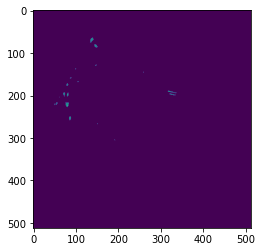

In [336]:
imshow(arr)

&lt;matplotlib.image.AxesImage at 0x13731394a58&gt;

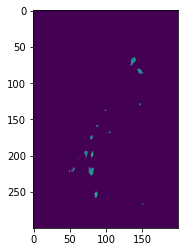

In [321]:
imshow(raster.ReadAsArray()[0:300,0:200])

In [233]:
#y_bound = (281,292)
#x_bound = (250,262)

with rasterio.open(files[0]) as netcdf:
    #print(dir(netcdf))
    #print(netcdf.profile)
    pixels2coords = netcdf.xy(281, 250)
    print(pixels2coords)

(-2.75, -12.75)


In [234]:
pixel2coord(250, 281)

(-2.75, -12.75)

In [282]:
inproj = pyproj.Proj('+proj=aea +lat_0=-34.2625 +lon_0=150.875 +lat_1=-32.7 +lat_2=-35.8 +x_0=0 +y_0=0 +ellps=GRS80 +units=km +no_defs')
outproj = pyproj.Proj('epsg:4326')
x1, y1 = pixel2coord(250,292)
x2, y2 = pyproj.transform(inproj, outproj, x1, y1)
print('in: '+str(x1)+', '+str(y1))
print('out: '+str(x2)+', '+str(y2))

in: -2.75, -18.25
out: -34.426956853554465, 150.84507190243838
C:\Users\nhutchis\Documents\Software\Anaconda3\envs\floodaware\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  after removing the cwd from sys.path.


In [58]:
x1

-127.75

In [288]:
raster.RasterYSize

512

In [285]:
dir(raster)

[&#39;AddBand&#39;,
 &#39;AdviseRead&#39;,
 &#39;BeginAsyncReader&#39;,
 &#39;BuildOverviews&#39;,
 &#39;CommitTransaction&#39;,
 &#39;CopyLayer&#39;,
 &#39;CreateLayer&#39;,
 &#39;CreateMaskBand&#39;,
 &#39;DeleteLayer&#39;,
 &#39;EndAsyncReader&#39;,
 &#39;ExecuteSQL&#39;,
 &#39;FlushCache&#39;,
 &#39;GetDescription&#39;,
 &#39;GetDriver&#39;,
 &#39;GetFileList&#39;,
 &#39;GetGCPCount&#39;,
 &#39;GetGCPProjection&#39;,
 &#39;GetGCPSpatialRef&#39;,
 &#39;GetGCPs&#39;,
 &#39;GetGeoTransform&#39;,
 &#39;GetLayer&#39;,
 &#39;GetLayerByIndex&#39;,
 &#39;GetLayerByName&#39;,
 &#39;GetLayerCount&#39;,
 &#39;GetMetadata&#39;,
 &#39;GetMetadataDomainList&#39;,
 &#39;GetMetadataItem&#39;,
 &#39;GetMetadata_Dict&#39;,
 &#39;GetMetadata_List&#39;,
 &#39;GetNextFeature&#39;,
 &#39;GetProjection&#39;,
 &#39;GetProjectionRef&#39;,
 &#39;GetRasterBand&#39;,
 &#39;GetRootGroup&#39;,
 &#39;GetSpatialRef&#39;,
 &#39;GetStyleTable&#39;,
 &#39;GetSubDatasets&#39;,
 &#39;GetTiledVirtualMem&#39;,
 &#39;Get

In [44]:
raster.GetSpatialRef().ExportToProj4()

&#39;+proj=aea +lat_0=-34.2625 +lon_0=150.875 +lat_1=-32.7 +lat_2=-35.8 +x_0=0 +y_0=0 +ellps=GRS80 +units=km +no_defs&#39;

In [4]:
data = Dataset(files[12], 'r', 'NETCDF4')

In [92]:
files[12]

'3_20200201_010000.prcp-c5.nc'

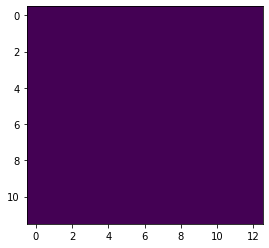

In [17]:
imshow(data.variables['precipitation'][281:292+1,250:262+1])

In [71]:
data.variables['precipitation'][511,511]

0.0

In [14]:
data.variables['valid_time'][0]*1

1580518800

In [18]:
data

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.7
    title: Bias Corrected Radar Accumulation (5 min)
    institution: Commonwealth of Australia, Bureau of Meteorology (ABN 92 637 533 532)
    source: rainfields 3.1.8 drs-rainfields 2019-12-16
    licence: http://www.bom.gov.au/other/copyright.shtml
    station_id: 3
    station_name: Wollgng
    dimensions(sizes): y(512), n2(2), x(512)
    variables(dimensions): int64 valid_time(), int64 start_time(), float64 y(y), float64 y_bounds(y,n2), float64 x(x), float64 x_bounds(x,n2), int16 precipitation(y,x), int8 proj()
    groups: 